# Case Study #03

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [92]:
data = pd.read_csv('Add_sales_data_2018.csv')
data

,Date,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4093.065
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,4042.448
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,4213.819
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,4391.665
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,4350.683
...,...,...,...,...,...,...,...
200,2017-12-14,288.00,288.25,279.20,284.50,284.30,5374.105
201,2017-12-13,290.00,292.50,282.20,284.80,284.45,5439.655
202,2017-12-12,298.60,298.60,286.65,287.45,287.80,5545.013
203,2017-12-11,290.00,299.55,285.90,297.85,298.35,5565.444


In [93]:
data.head()

,Date,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4093.065
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,4042.448
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,4213.819
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,4391.665
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,4350.683


In [94]:
data.tail()

,Date,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands)
200,2017-12-14,288.00,288.25,279.20,284.50,284.30,5374.105
201,2017-12-13,290.00,292.50,282.20,284.80,284.45,5439.655
202,2017-12-12,298.60,298.60,286.65,287.45,287.80,5545.013
203,2017-12-11,290.00,299.55,285.90,297.85,298.35,5565.444
204,2017-12-08,287.55,289.90,285.05,288.05,288.45,5421.842


In [95]:
data.shape

(205, 7)

In [96]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  205 non-null    object 
 1   Add1(in Thousands)    205 non-null    float64
 2   Add2(in Thousands)    205 non-null    float64
 3   Add3(in Thousands)    205 non-null    float64
 4   Add4(in Thousands)    205 non-null    float64
 5   Add5(in Thousands)    205 non-null    float64
 6   Profit(in Thousands)  205 non-null    float64
dtypes: float64(6), object(1)
memory usage: 11.3+ KB


In [97]:
data.isnull().sum()

Date                    0
Add1(in Thousands)      0
Add2(in Thousands)      0
Add3(in Thousands)      0
Add4(in Thousands)      0
Add5(in Thousands)      0
Profit(in Thousands)    0
dtype: int64

### 1. Checking the relationship between the amount spent for advertising through five different companies and profit generated. 

<AxesSubplot:>

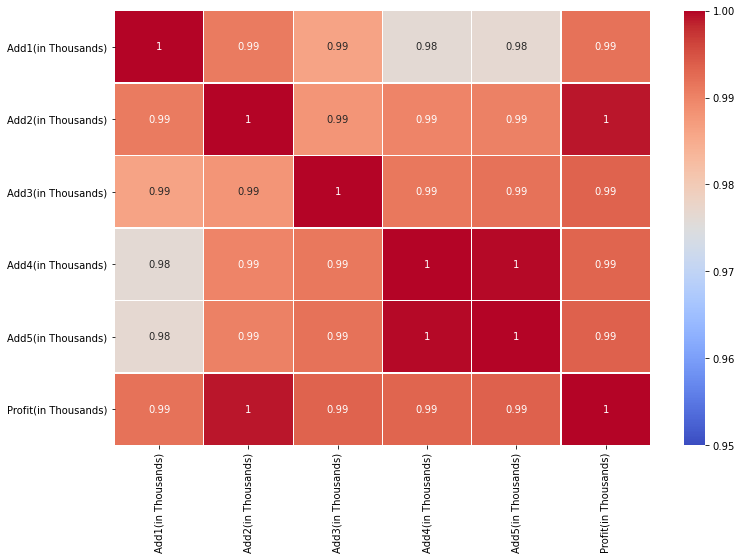

In [98]:
corrmatrix = data.corr()
plt.subplots(figsize=(12,8))
sns.heatmap(corrmatrix,vmin=0.95,vmax=1,annot=True,linewidths=0.2,cmap='coolwarm')

#### Insight:

The amount spent for advertising through 5 different companies and profit generated are actually related as understood from the heatmap. Features, add4 & add5, are showing correlation between them and both of them have equal contribution to the profit generated as per the heatmap.

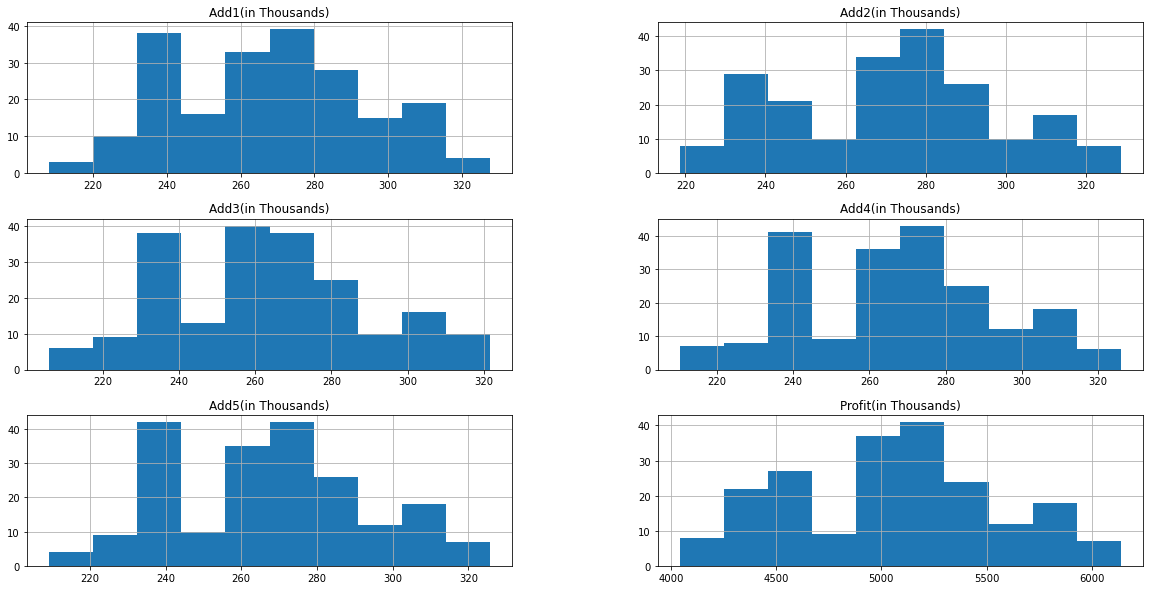

In [99]:
graph = data.select_dtypes(include=['float64']) #selecting variables
graph.hist(figsize=(20,10))
plt.show()

### 2. Building a regression model to predict the profit from given data. 

In [100]:
data.columns

Index(['Date', 'Add1(in Thousands)', 'Add2(in Thousands)',
       'Add3(in Thousands)', 'Add4(in Thousands)', 'Add5(in Thousands)',
       'Profit(in Thousands)'],
      dtype='object')

In [101]:
data1 = data.drop(['Date','Add4(in Thousands)'],axis=1)
#dropping add4 since add4&5 are highly correlated and both have equal contribution to profit
#dropping date column too, since it has nothing to do with profit predictions.

In [102]:
data1.columns

Index(['Add1(in Thousands)', 'Add2(in Thousands)', 'Add3(in Thousands)',
       'Add5(in Thousands)', 'Profit(in Thousands)'],
      dtype='object')

In [136]:
y = data1['Profit(in Thousands)']
X = data1.drop(['Profit(in Thousands)'],axis=1)

In [137]:
X.shape

(205, 4)

In [138]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Add1(in Thousands)  205 non-null    float64
 1   Add2(in Thousands)  205 non-null    float64
 2   Add3(in Thousands)  205 non-null    float64
 3   Add5(in Thousands)  205 non-null    float64
dtypes: float64(4)
memory usage: 6.5 KB


In [139]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.3)

In [140]:
from sklearn import linear_model
lr = linear_model.LinearRegression()
dummy = lr.fit(X_train,y_train)
predictions = dummy.predict(X_test)
print(y_test)

15     4152.066
9      4446.441
100    5131.898
132    4907.560
68     5004.282
         ...   
56     4947.720
128    5185.639
76     5225.140
144    5111.806
104    5518.561
Name: Profit(in Thousands), Length: 62, dtype: float64


In [141]:
print(predictions)

[4153.30091524 4445.74485363 5130.31194344 4906.5009831  5006.82934283
 4623.37871824 5384.56149117 5328.07803304 5174.24370881 5956.14830808
 5780.66051003 4998.60686728 5075.71218324 5783.13592675 4936.48735343
 5065.32654192 4190.90822424 5034.92030714 5013.69957154 5134.44877437
 5145.26691471 5422.49858516 4569.04723267 4597.9226097  4436.7387539
 4175.23409335 5616.11646597 5667.24974521 4648.97050236 5717.82392801
 5000.54486283 5182.27591418 5017.71317871 5545.20253607 5013.75747885
 5033.30164598 5108.64288164 4759.98920364 4604.90448421 4925.61029966
 5252.34316365 5038.54349109 5491.86215827 5019.17052684 4646.98853478
 4486.41434186 4434.02038896 5300.4920799  5425.32088813 4482.16126062
 4193.26732877 6061.1359857  4887.39337726 5805.06748707 4705.51916387
 4405.05545724 5464.1374467  4948.27789204 5185.21794653 5224.97864052
 5112.25581083 5518.72858015]


Since we can't manually check the accuracy of the predicted values we shall go for mean_squared_error

In [142]:
from sklearn.metrics import mean_squared_error
e=mean_squared_error(y_test,predictions)
print('The MSE is : %0.3f'%e)

The MSE is : 0.686


This shows a large error in predictions. So we shall go for predictions by droping add5 instead of add4.

In [143]:
data2 = data.drop(['Date','Add5(in Thousands)'],axis=1)
#dropping add5 since the previous calculation gave large MSE..!!
#dropping date column too, since it has nothing to do with profit predictions.

In [144]:
data2.columns

Index(['Add1(in Thousands)', 'Add2(in Thousands)', 'Add3(in Thousands)',
       'Add4(in Thousands)', 'Profit(in Thousands)'],
      dtype='object')

In [145]:
y = data2['Profit(in Thousands)']
X = data2.drop(['Profit(in Thousands)'],axis=1)

In [146]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Add1(in Thousands)  205 non-null    float64
 1   Add2(in Thousands)  205 non-null    float64
 2   Add3(in Thousands)  205 non-null    float64
 3   Add4(in Thousands)  205 non-null    float64
dtypes: float64(4)
memory usage: 6.5 KB


In [147]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.3)

In [148]:
from sklearn import linear_model
lr = linear_model.LinearRegression()
dummy = lr.fit(X_train,y_train)
predictions = dummy.predict(X_test)
print(y_test)

15     4152.066
9      4446.441
100    5131.898
132    4907.560
68     5004.282
         ...   
56     4947.720
128    5185.639
76     5225.140
144    5111.806
104    5518.561
Name: Profit(in Thousands), Length: 62, dtype: float64


In [149]:
print(predictions)

[4150.86786185 4447.10245069 5133.45383151 4908.26985367 5002.13240271
 4624.16361406 5383.92552398 5328.01037622 5175.58953463 5956.57229017
 5780.90251952 4996.84813668 5076.08267221 5785.55926725 4935.74081161
 5065.83898649 4190.93885419 5034.51404109 5016.95625304 5134.85143335
 5144.92568158 5421.54271302 4569.52434524 4598.6024762  4436.00559162
 4176.15660722 5617.39360986 5667.22460143 4648.68110832 5717.91100883
 5002.56448613 5182.39777643 5017.27807559 5544.95793674 5012.7085219
 5028.09438974 5108.59938567 4761.74698243 4607.58009427 4925.97551572
 5249.67746638 5037.89791133 5491.69395859 5020.81382275 4647.64794962
 4486.39897443 4436.01290101 5300.50815413 5425.05673571 4482.16128263
 4192.88982658 6063.6222896  4887.18536369 5805.82740591 4704.91211617
 4404.29646708 5466.08723907 4947.30029627 5185.93095645 5225.39369154
 5111.23585585 5518.4224733 ]


In [150]:
from sklearn.metrics import mean_squared_error
e=mean_squared_error(y_test,predictions)
print('The MSE is : %0.3f'%e)

The MSE is : 0.486


#### Findings:

- Based on 2 regression models created the one which was predicted by dropping Add5 gave accurate values.
- It shows add4 is more worth in terms of profit generated for the textile company.
- MSE value was small for the 2nd prediction indicating its reliability for more predictions.

### 3. Predicting profit based  on given ad amount

In [152]:
fut_prediction = [[290,312,309,298]]#add5 is dropped for better predictions, so isn't considerd.
dummy.predict(fut_prediction).item()

5801.68051325114

As per the best regression model, the profit based on given ad amount in thousands is obtained as above.